MSE: 0.5558915986952422
R^2: 0.5757877060324524


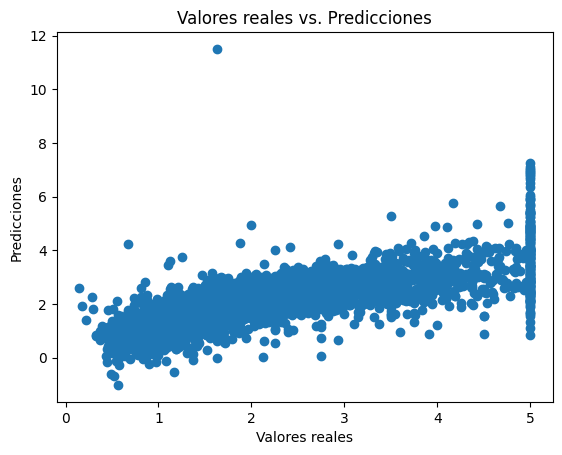

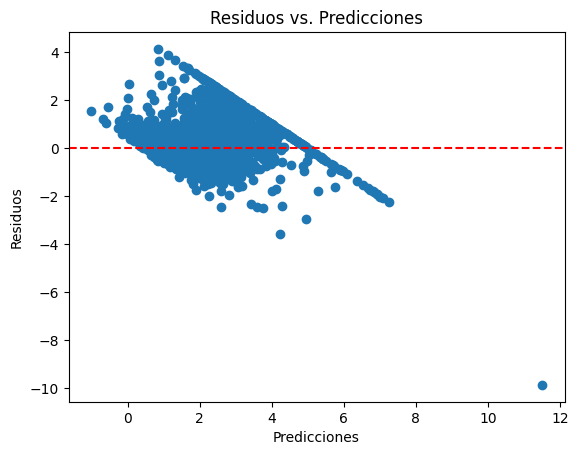

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Gráfico de predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

# Gráfico de residuos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [4]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=fe23a595910f2b8e4f0708dc4da6e683c398c790f3890d919ad6999e92f4369b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


RMSE: 0.733293906676871
R^2: 0.5863933868971052


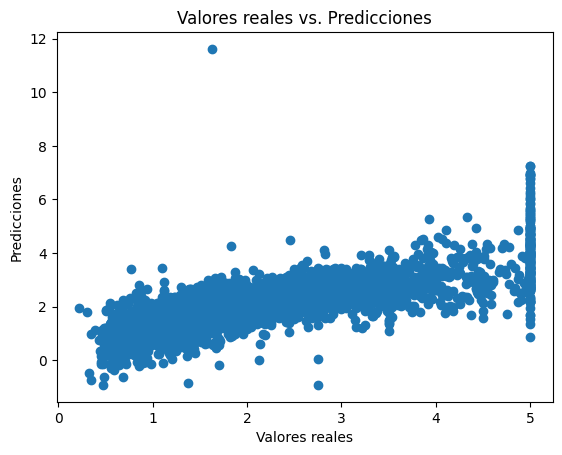

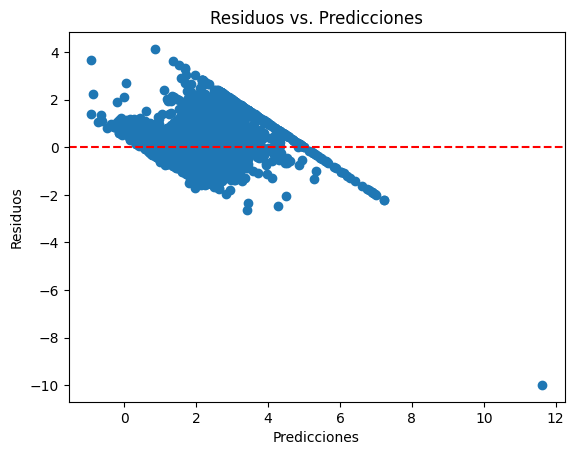

In [9]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import numpy as np
from sklearn import datasets

# Iniciar una sesión de Spark
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

# Cargar el dataset
california = datasets.fetch_california_housing()
data = np.c_[california['data'], california['target']]
columns = list(california['feature_names']) + ['TARGET']
df = spark.createDataFrame(data, columns)

# Preparar los datos
assembler = VectorAssembler(inputCols=california['feature_names'], outputCol="features")
df = assembler.transform(df).select("features", "TARGET")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Crear el modelo de regresión lineal
lr = LinearRegression(labelCol="TARGET")

# Entrenar el modelo
lr_model = lr.fit(train_data)

# Predecir con el conjunto de prueba
predictions = lr_model.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="TARGET", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Interpretación de los resultados
# Puedes observar que el modelo tiene un RMSE y un R^2, lo que indica qué tan bien se ajusta el modelo a los datos.
# Convertir predicciones a Pandas DataFrame para visualización
predictions_pd = predictions.select("prediction", "TARGET").toPandas()

# Gráfico de predicciones vs. valores reales
plt.scatter(predictions_pd["TARGET"], predictions_pd["prediction"])
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

# Gráfico de residuos
residuals = predictions_pd["TARGET"] - predictions_pd["prediction"]
plt.scatter(predictions_pd["prediction"], residuals)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

MSE: 0.5558034669932196
R^2: 0.5758549611440138


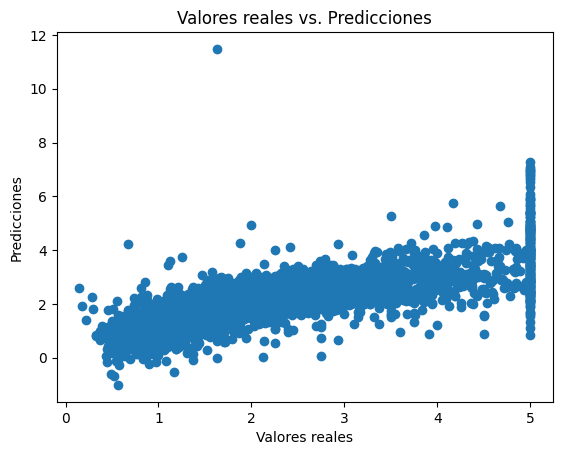

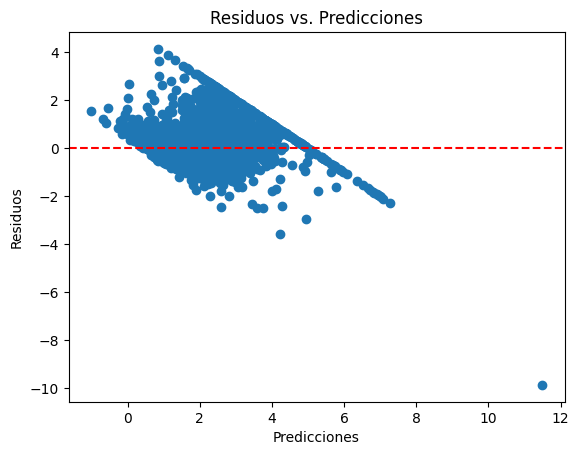

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión Ridge
ridge = Ridge(alpha=1.0)

# Entrenar el modelo
ridge.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = ridge.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Gráfico de predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

# Gráfico de residuos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

RMSE: 0.7415115632789654
R^2: 0.5770712806085219


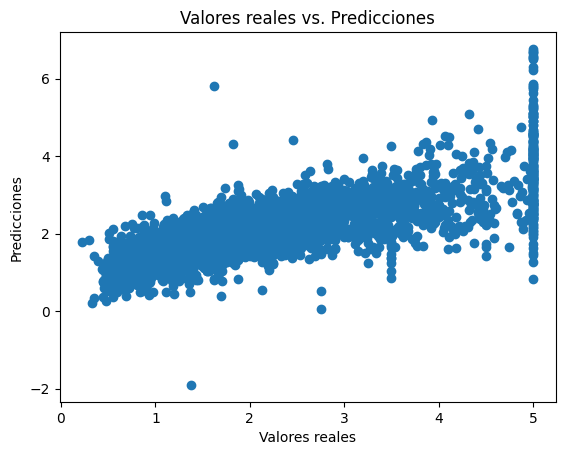

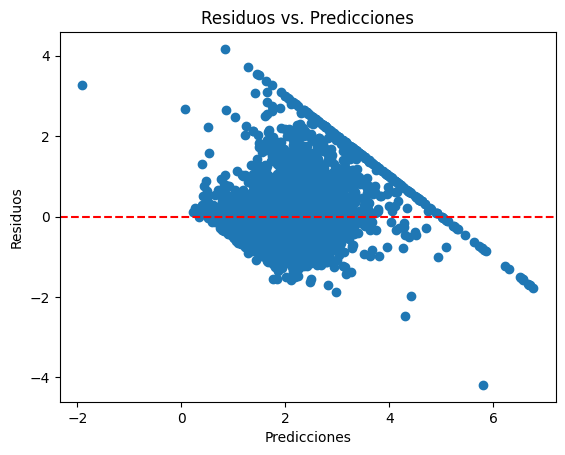

In [11]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Iniciar una sesión de Spark
spark = SparkSession.builder.appName("RidgeRegressionExample").getOrCreate()

# Cargar el dataset
california = datasets.fetch_california_housing()
data = np.c_[california['data'], california['target']]
columns = list(california['feature_names']) + ['TARGET']
df = spark.createDataFrame(data, columns)

# Preparar los datos
assembler = VectorAssembler(inputCols=california['feature_names'], outputCol="features")
df = assembler.transform(df).select("features", "TARGET")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Crear el modelo de regresión Ridge
# Spark MLlib no tiene Ridge Regression directamente, pero se puede simular con LinearRegression usando regParam
ridge = LinearRegression(labelCol="TARGET", regParam=0.1)

# Entrenar el modelo
ridge_model = ridge.fit(train_data)

# Predecir con el conjunto de prueba
predictions = ridge_model.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="TARGET", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Convertir predicciones a Pandas DataFrame para visualización
predictions_pd = predictions.select("prediction", "TARGET").toPandas()

# Gráfico de predicciones vs. valores reales
plt.scatter(predictions_pd["TARGET"], predictions_pd["prediction"])
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

# Gráfico de residuos
residuals = predictions_pd["TARGET"] - predictions_pd["prediction"]
plt.scatter(predictions_pd["prediction"], residuals)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

MSE: 0.9380337514945428
R^2: 0.2841671821008396


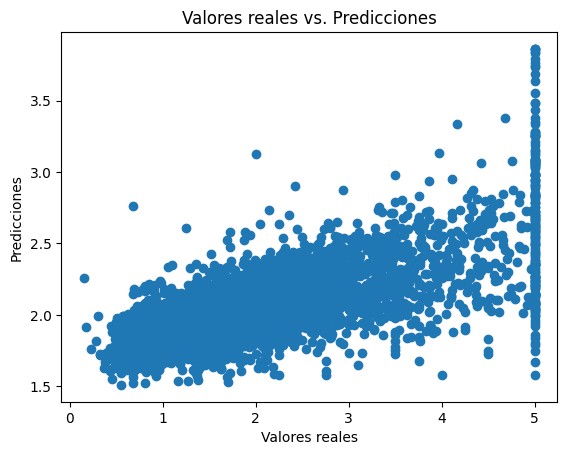

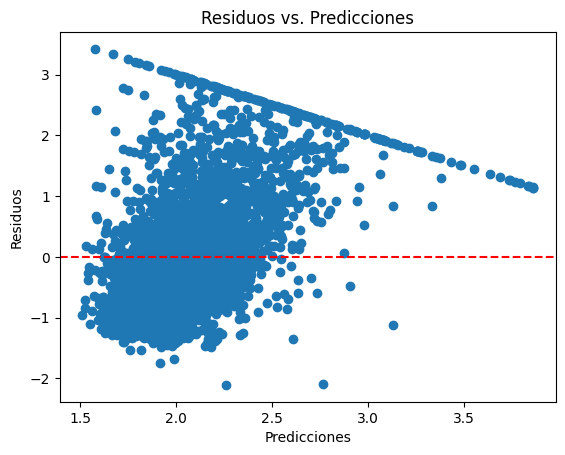

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión Lasso
lasso = Lasso(alpha=1.0)

# Entrenar el modelo
lasso.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = lasso.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Gráfico de predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

# Gráfico de residuos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

RMSE: 0.8082788201974612
R^2: 0.49747957394687337


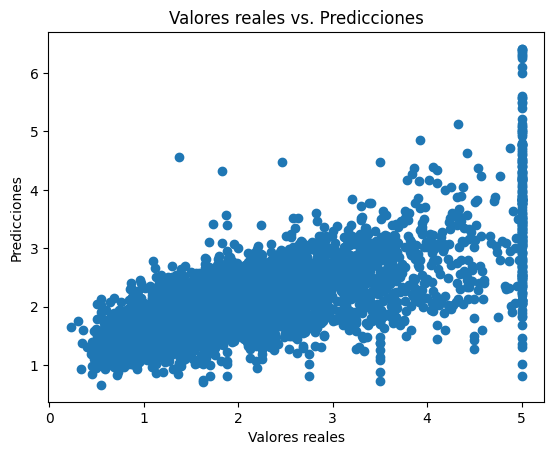

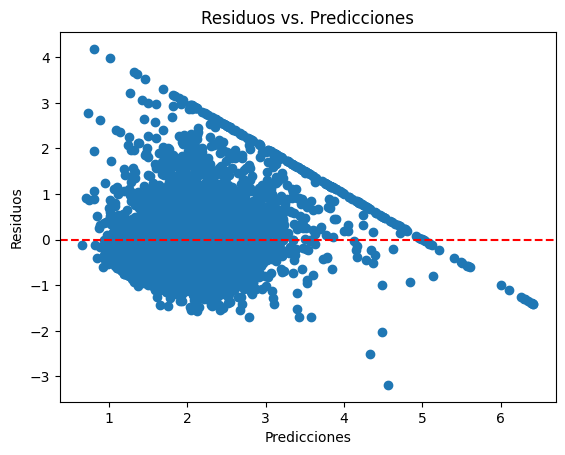

In [13]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Iniciar una sesión de Spark
spark = SparkSession.builder.appName("LassoRegressionExample").getOrCreate()

# Cargar el dataset
california = datasets.fetch_california_housing()
data = np.c_[california['data'], california['target']]
columns = list(california['feature_names']) + ['TARGET']
df = spark.createDataFrame(data, columns)

# Preparar los datos
assembler = VectorAssembler(inputCols=california['feature_names'], outputCol="features")
df = assembler.transform(df).select("features", "TARGET")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Crear el modelo de regresión Lasso
# Spark MLlib no tiene Lasso Regression directamente, pero se puede simular con LinearRegression usando elasticNetParam
lasso = LinearRegression(labelCol="TARGET", regParam=0.1, elasticNetParam=1.0)

# Entrenar el modelo
lasso_model = lasso.fit(train_data)

# Predecir con el conjunto de prueba
predictions = lasso_model.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="TARGET", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Convertir predicciones a Pandas DataFrame para visualización
predictions_pd = predictions.select("prediction", "TARGET").toPandas()

# Gráfico de predicciones vs. valores reales
plt.scatter(predictions_pd["TARGET"], predictions_pd["prediction"])
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

# Gráfico de residuos
residuals = predictions_pd["TARGET"] - predictions_pd["prediction"]
plt.scatter(predictions_pd["prediction"], residuals)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [14]:
import numpy as np
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
california = datasets.fetch_california_housing()
X = california.data[:, np.newaxis, 2]  # Usar solo una característica para visualización
y = california.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión polinómica
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo
polyreg.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = polyreg.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Validación cruzada
scores = cross_val_score(polyreg, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2: {scores.mean()}")

# Gráfico de predicciones vs. valores reales
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Valores reales', 'y': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
residuals = y_test - y_pred
fig = px.scatter(x=y_pred, y=residuals, labels={'x': 'Predicciones', 'y': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()

MSE: 1.2498518113829606
R^2: 0.046212417545575146
Cross-validated R^2: -0.551827077687155


In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler, PolynomialExpansion
from sklearn import datasets
import numpy as np
import pandas as pd
import plotly.express as px

# Iniciar una sesión de Spark
spark = SparkSession.builder.appName("PolynomialRegressionExample").getOrCreate()

# Cargar el dataset
california = datasets.fetch_california_housing()
data = np.c_[california['data'][:, 2], california['target']]
columns = ['MedInc', 'TARGET']
df = spark.createDataFrame(data, columns)

# Preparar los datos
assembler = VectorAssembler(inputCols=['MedInc'], outputCol="features")
df = assembler.transform(df).select("features", "TARGET")

# Expandir las características polinómicamente
polyExpansion = PolynomialExpansion(degree=2, inputCol="features", outputCol="polyFeatures")
polyDF = polyExpansion.transform(df).select("polyFeatures", "TARGET")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = polyDF.randomSplit([0.8, 0.2], seed=42)

# Crear el modelo de regresión polinómica
polyreg = LinearRegression(featuresCol="polyFeatures", labelCol="TARGET")

# Entrenar el modelo
polyreg_model = polyreg.fit(train_data)

# Predecir con el conjunto de prueba
predictions = polyreg_model.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="TARGET", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Convertir predicciones a Pandas DataFrame para visualización
predictions_pd = predictions.select("prediction", "TARGET").toPandas()

# Gráfico de predicciones vs. valores reales
fig = px.scatter(predictions_pd, x="TARGET", y="prediction", labels={'TARGET': 'Valores reales', 'prediction': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
predictions_pd['residuals'] = predictions_pd['TARGET'] - predictions_pd['prediction']
fig = px.scatter(predictions_pd, x="prediction", y="residuals", labels={'prediction': 'Predicciones', 'residuals': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()

RMSE: 1.1136805017542764
R^2: 0.04285437433271011


In [16]:
import numpy as np
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
california = datasets.fetch_california_housing()
X = california.data[:, np.newaxis, 2]  # Usar solo una característica para visualización
y = california.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión polinómica con validación cruzada
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Validación cruzada
scores = cross_val_score(polyreg, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R^2: {scores.mean()}")

# Entrenar el modelo
polyreg.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = polyreg.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Gráfico de predicciones vs. valores reales
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Valores reales', 'y': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
residuals = y_test - y_pred
fig = px.scatter(x=y_pred, y=residuals, labels={'x': 'Predicciones', 'y': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()

Cross-validated R^2: -0.18307283958921694
MSE: 1.2498518113829606
R^2: 0.046212417545575146


In [17]:


from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler, PolynomialExpansion
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from sklearn import datasets
import numpy as np
import pandas as pd
import plotly.express as px

# Iniciar una sesión de Spark
spark = SparkSession.builder.appName("PolynomialRegressionCVExample").getOrCreate()

# Cargar el dataset
california = datasets.fetch_california_housing()
data = np.c_[california['data'][:, 2], california['target']]
columns = ['MedInc', 'TARGET']
df = spark.createDataFrame(data, columns)

# Preparar los datos
assembler = VectorAssembler(inputCols=['MedInc'], outputCol="features")
df = assembler.transform(df).select("features", "TARGET")

# Expandir las características polinómicamente
polyExpansion = PolynomialExpansion(degree=2, inputCol="features", outputCol="polyFeatures")
polyDF = polyExpansion.transform(df).select("polyFeatures", "TARGET")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = polyDF.randomSplit([0.8, 0.2], seed=42)

# Crear el modelo de regresión polinómica
polyreg = LinearRegression(featuresCol="polyFeatures", labelCol="TARGET")

# Crear una grid de hiperparámetros
paramGrid = ParamGridBuilder().addGrid(polyreg.regParam, [0.1, 0.01]).build()

# Validación cruzada
crossval = CrossValidator(estimator=polyreg,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(labelCol="TARGET"),
                          numFolds=5)

# Entrenar el modelo
cvModel = crossval.fit(train_data)

# Predecir con el conjunto de prueba
predictions = cvModel.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="TARGET", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Convertir predicciones a Pandas DataFrame para visualización
predictions_pd = predictions.select("prediction", "TARGET").toPandas()

# Gráfico de predicciones vs. valores reales
fig = px.scatter(predictions_pd, x="TARGET", y="prediction", labels={'TARGET': 'Valores reales', 'prediction': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
predictions_pd['residuals'] = predictions_pd['TARGET'] - predictions_pd['prediction']
fig = px.scatter(predictions_pd, x="prediction", y="residuals", labels={'prediction': 'Predicciones', 'residuals': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()


RMSE: 1.1157309382622933
R^2: 0.039326660582920114


In [18]:
import numpy as np
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión Elastic Net
elastic_net = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))

# Entrenar el modelo
elastic_net.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = elastic_net.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Validación cruzada
scores = cross_val_score(elastic_net, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2: {scores.mean()}")

# Gráfico de predicciones vs. valores reales
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Valores reales', 'y': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
residuals = y_test - y_pred
fig = px.scatter(x=y_pred, y=residuals, labels={'x': 'Predicciones', 'y': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()

MSE: 0.6358566879910775
R^2: 0.5147647043408882
Cross-validated R^2: 0.46001963429059406


In [19]:


from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from sklearn import datasets
import numpy as np
import pandas as pd
import plotly.express as px

# Iniciar una sesión de Spark
spark = SparkSession.builder.appName("ElasticNetRegressionExample").getOrCreate()

# Cargar el dataset
california = datasets.fetch_california_housing()
data = np.c_[california['data'], california['target']]
columns = list(california['feature_names']) + ['TARGET']
df = spark.createDataFrame(data, columns)

# Preparar los datos
assembler = VectorAssembler(inputCols=california['feature_names'], outputCol="features")
df = assembler.transform(df).select("features", "TARGET")

# Normalizar los datos
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
df = scaler.fit(df).transform(df).select("scaledFeatures", "TARGET").withColumnRenamed("scaledFeatures", "features")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Crear el modelo de regresión Elastic Net
elastic_net = LinearRegression(featuresCol="features", labelCol="TARGET", elasticNetParam=0.5)

# Entrenar el modelo
elastic_net_model = elastic_net.fit(train_data)

# Predecir con el conjunto de prueba
predictions = elastic_net_model.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="TARGET", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Convertir predicciones a Pandas DataFrame para visualización
predictions_pd = predictions.select("prediction", "TARGET").toPandas()

# Gráfico de predicciones vs. valores reales
fig = px.scatter(predictions_pd, x="TARGET", y="prediction", labels={'TARGET': 'Valores reales', 'prediction': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
predictions_pd['residuals'] = predictions_pd['TARGET'] - predictions_pd['prediction']
fig = px.scatter(predictions_pd, x="prediction", y="residuals", labels={'prediction': 'Predicciones', 'residuals': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()


RMSE: 0.7332939066702782
R^2: 0.5863933869045423


In [20]:
import numpy as np
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión Elastic Net con validación cruzada
elastic_net = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))

# Validación cruzada
scores = cross_val_score(elastic_net, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R^2: {scores.mean()}")

# Entrenar el modelo
elastic_net.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = elastic_net.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Gráfico de predicciones vs. valores reales
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Valores reales', 'y': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
residuals = y_test - y_pred
fig = px.scatter(x=y_pred, y=residuals, labels={'x': 'Predicciones', 'y': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()

Cross-validated R^2: 0.5304570231999033
MSE: 0.6358566879910775
R^2: 0.5147647043408882


In [21]:


from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from sklearn import datasets
import numpy as np
import pandas as pd
import plotly.express as px

# Iniciar una sesión de Spark
spark = SparkSession.builder.appName("ElasticNetRegressionCVExample").getOrCreate()

# Cargar el dataset
california = datasets.fetch_california_housing()
data = np.c_[california['data'], california['target']]
columns = list(california['feature_names']) + ['TARGET']
df = spark.createDataFrame(data, columns)

# Preparar los datos
assembler = VectorAssembler(inputCols=california['feature_names'], outputCol="features")
df = assembler.transform(df).select("features", "TARGET")

# Normalizar los datos
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
df = scaler.fit(df).transform(df).select("scaledFeatures", "TARGET").withColumnRenamed("scaledFeatures", "features")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Crear el modelo de regresión Elastic Net
elastic_net = LinearRegression(featuresCol="features", labelCol="TARGET", elasticNetParam=0.5)

# Crear una grid de hiperparámetros
paramGrid = ParamGridBuilder().addGrid(elastic_net.regParam, [0.1, 0.01]).build()

# Validación cruzada
crossval = CrossValidator(estimator=elastic_net,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(labelCol="TARGET"),
                          numFolds=5)

# Entrenar el modelo
cvModel = crossval.fit(train_data)

# Predecir con el conjunto de prueba
predictions = cvModel.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="TARGET", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Convertir predicciones a Pandas DataFrame para visualización
predictions_pd = predictions.select("prediction", "TARGET").toPandas()

# Gráfico de predicciones vs. valores reales
fig = px.scatter(predictions_pd, x="TARGET", y="prediction", labels={'TARGET': 'Valores reales', 'prediction': 'Predicciones'}, title="Valores reales vs. Predicciones")
fig.show()

# Gráfico de residuos
predictions_pd['residuals'] = predictions_pd['TARGET'] - predictions_pd['prediction']
fig = px.scatter(predictions_pd, x="prediction", y="residuals", labels={'prediction': 'Predicciones', 'residuals': 'Residuos'}, title="Residuos vs. Predicciones")
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()


RMSE: 0.7262528779235029
R^2: 0.5942980881297166
